In [363]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
import math

sns.set(rc={'figure.figsize':(15, 6)})

In [123]:
def preprocess(df):
    """Preprocess data for KMeans clustering"""
    
    #df_log = np.log1p(df)
    scaler = StandardScaler()
    scaler.fit(df)
    df_norm = scaler.transform(df)
    
    return df_norm

In [124]:
def elbow_plot(df):
    """Create elbow plot from normalized data"""
    
    df_norm = preprocess(df)
    
    sse = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df_norm)
        sse[k] = kmeans.inertia_
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()

In [125]:
def find_k(df, increment=0, decrement=0):
    """Find the optimum k clusters"""
    
    df_norm = preprocess(df)
    sse = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df_norm)
        sse[k] = kmeans.inertia_
    
    kn = KneeLocator(x=list(sse.keys()), 
                 y=list(sse.values()), 
                 curve='convex', 
                 direction='decreasing')
    k = kn.knee + increment - decrement
    return k

In [533]:
def run_kmeans(df, increment=0, decrement=0):
    """Run KMeans clustering, including the preprocessing of the data
    and the automatic selection of the optimum k. 
    """
    
    df_norm = preprocess(df)
    k = find_k(df, increment, decrement)
    kmeans = KMeans(n_clusters=k, 
                    random_state=1)
    kmeans.fit(df_norm)
    return df.assign(cluster=kmeans.labels_)

def run_kmeans2(df, k, increment=0, decrement=0):
    """Run KMeans clustering, including the preprocessing of the data
    and the automatic selection of the optimum k. 
    """
    
    df_norm = preprocess(df)
    kmeans = KMeans(n_clusters=k, 
                    random_state=1)
    kmeans.fit(df_norm)
    return df.assign(cluster=kmeans.labels_)

In [238]:
df = pd.read_csv('missesTotal.csv')  

In [239]:
df

,Unnamed: 0.1,Unnamed: 0,label,text,category,original_id,predicted_label,emb_0,emb_1,emb_2,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
0,0,813,neutral,@united I hope so too,0,813,1,0.701212,0.149414,1.801739,...,-0.641708,-0.631561,0.724360,-0.479683,0.342981,-0.128573,-0.765833,-0.322237,-0.484272,-0.027367
1,1,7130,neutral,@jetblue who's running your tweeter using the ...,0,7130,2,-0.095302,0.519799,-0.860941,...,-0.844507,0.545532,-0.988797,-0.470753,0.221976,-0.781311,0.437286,0.007654,-0.176711,0.090562
2,2,3380,neutral,@united still waiting for a response on whethe...,0,3380,2,0.404428,-0.281564,1.098605,...,0.027952,-0.336490,-0.060362,-0.929268,0.410162,0.116782,-0.160092,-0.028493,-0.795741,0.037037
3,3,3008,neutral,@united Based on suggestions from other passen...,0,3008,2,0.580564,-0.417264,0.539577,...,-0.246741,-1.197115,-0.562455,-0.443025,-0.123202,-0.652523,-0.151871,0.264033,-0.452444,-0.366747
4,4,7030,neutral,“@JetBlue: Our fleet's on fleek. http://t.co/Q...,0,7030,2,0.150641,0.191832,0.901386,...,-0.277474,-0.263758,0.017206,-0.703940,-0.521036,0.051719,0.339595,0.206907,-0.883897,0.368364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,963,4377,positive,@SouthwestAir @heavenlychc9 I'd at least enjoy...,1,4377,0,-0.288926,-0.469544,0.763421,...,-0.027024,-1.082415,-0.697840,-0.485712,-0.417425,0.451793,-0.545403,-0.404581,-0.650430,0.245911
964,964,5512,positive,@SouthwestAir I'll have to drop by next time I...,1,5512,0,-0.287779,-0.133505,1.637628,...,-0.028515,-0.204185,-0.278846,0.153048,-0.024744,0.142459,-0.391037,-0.188013,-0.114064,0.296878
965,965,56,positive,@VirginAmerica you know it. Need it on my spot...,1,56,0,-0.120062,0.689700,0.500194,...,-0.449935,-0.235210,-0.653002,-1.018101,-0.308710,-0.254051,-0.067138,0.288422,-0.103543,-0.275301
966,966,6239,positive,@SouthwestAir I'm really craving your pretzels...,1,6239,0,-0.466340,0.289625,-0.217530,...,-0.224040,-0.835734,-0.458101,-1.050726,-0.012579,0.600473,-0.229492,0.395023,-0.019480,0.537425


In [240]:
df2 = df[["emb_" + str(i) for i in range(768)]]

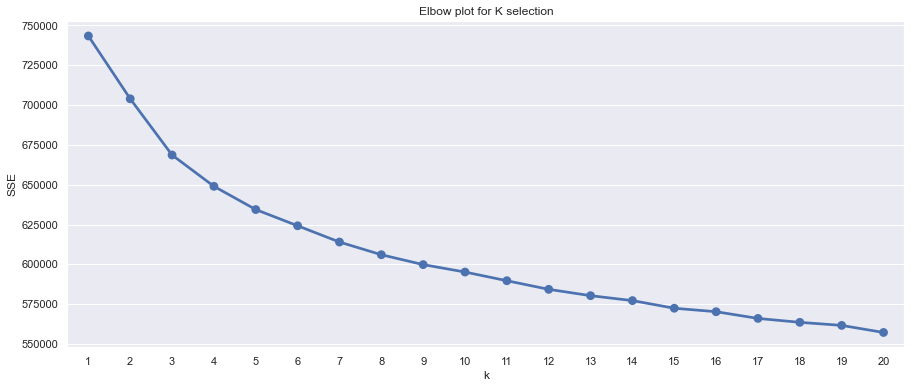

In [241]:
elbow_plot(df2)

In [242]:
find_k(df2)

7

In [243]:
df3 = run_kmeans(df2)

In [244]:
df['cluster'] = df3["cluster"].to_numpy()

In [538]:
df3_v2 = run_kmeans2(df2, 10)
df['cluster_2'] = df3_v2["cluster"].to_numpy()

In [535]:
df

,Unnamed: 0.1,Unnamed: 0,label,text,category,original_id,predicted_label,emb_0,emb_1,emb_2,...,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767,cluster,x,y,cluster_2
0,0,813,neutral,@united I hope so too,0,813,1,0.701212,0.149414,1.801739,...,0.342981,-0.128573,-0.765833,-0.322237,-0.484272,-0.027367,3,0.587543,8.812499,17
1,1,7130,neutral,@jetblue who's running your tweeter using the ...,0,7130,2,-0.095302,0.519799,-0.860941,...,0.221976,-0.781311,0.437286,0.007654,-0.176711,0.090562,1,1.895022,16.144014,12
2,2,3380,neutral,@united still waiting for a response on whethe...,0,3380,2,0.404428,-0.281564,1.098605,...,0.410162,0.116782,-0.160092,-0.028493,-0.795741,0.037037,5,2.796941,10.834550,11
3,3,3008,neutral,@united Based on suggestions from other passen...,0,3008,2,0.580564,-0.417264,0.539577,...,-0.123202,-0.652523,-0.151871,0.264033,-0.452444,-0.366747,5,3.194815,11.002142,10
4,4,7030,neutral,“@JetBlue: Our fleet's on fleek. http://t.co/Q...,0,7030,2,0.150641,0.191832,0.901386,...,-0.521036,0.051719,0.339595,0.206907,-0.883897,0.368364,1,2.420096,15.734237,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,963,4377,positive,@SouthwestAir @heavenlychc9 I'd at least enjoy...,1,4377,0,-0.288926,-0.469544,0.763421,...,-0.417425,0.451793,-0.545403,-0.404581,-0.650430,0.245911,0,6.508027,10.849288,13
964,964,5512,positive,@SouthwestAir I'll have to drop by next time I...,1,5512,0,-0.287779,-0.133505,1.637628,...,-0.024744,0.142459,-0.391037,-0.188013,-0.114064,0.296878,0,5.614790,12.739031,9
965,965,56,positive,@VirginAmerica you know it. Need it on my spot...,1,56,0,-0.120062,0.689700,0.500194,...,-0.308710,-0.254051,-0.067138,0.288422,-0.103543,-0.275301,5,2.111580,11.172903,21
966,966,6239,positive,@SouthwestAir I'm really craving your pretzels...,1,6239,0,-0.466340,0.289625,-0.217530,...,-0.012579,0.600473,-0.229492,0.395023,-0.019480,0.537425,0,5.893790,11.112502,13


In [249]:
arr_emb = df2.to_numpy()

In [250]:
import umap

In [251]:
mapper = umap.UMAP().fit(arr_emb)
twod = mapper.transform(arr_emb)
twod.shape

(968, 2)

In [252]:
df["x"] = twod[:, 0]
df["y"] = twod[:, 1]

In [548]:
import plotly.express as px

fig = px.scatter(
    df.loc[(df["label"] == "positive") & (df["cluster_2"] == 6)], x='x', y='y', color='cluster_2', hover_data=['x', 'y', 'text', 'label', 'cluster', 'cluster_2', 'predicted_label'])

fig.show()

In [529]:
cluster = 2
label = "neutral"


In [530]:
for i in df.loc[(df["label"] == label) & (df["cluster"] == cluster)]["text"].to_numpy():
    print(i + '\n')

@AmericanAir well you spelled my name wrong.

@AmericanAir your message was delayed I just responded

@AmericanAir I need some help. My record locator is bringing up TWO different flights in your system. One op by AA &amp; one from US Airways.

@AmericanAir where do I look for cabin crew vacancies?

@AmericanAir Still looking as we speak.

@AmericanAir - keeping AA up in the Air! My crew chief cousin Alex Espinosa in DFW! http://t.co/0HXLNvZknP

@AmericanAir this receipt doesn't show the evoucher value nor does it mention having used an evoucher

@AmericanAir I've tried...its @USAirways anyway

@AmericanAir thanks!

@AmericanAir basically u right now http://t.co/IN24Bpb7dw

@AmericanAir no not yet. Waiting to be connected to an agent

@AmericanAir DM sent. Answer me please

@AmericanAir  hung up on now many times trying to cal 8004337300 crazy

@AmericanAir the dinner and called me "hon". Not the service I would expect from 1st class.  #disappointed

@AmericanAir Why did  AA973 return 

In [508]:
queries = 
# neg 6 ["@Delta I love how you manage to be the only airline that can consistently ruin my day with delayed flights and lost baggage #sarcasm",
# "@AmericanAir If only your customer service was as good as your prices...",
# "@united thanks for the 2-hour delay, the rude staff, and the overpriced snacks. You're really outdoing yourself",
# "@SouthwestAir how is it that your planes never seem to have enough legroom? You're supposed to be the friendly airline, not the cramped one",
# "@JetBlue thanks for the delayed flight and the poor communication with your customers. You guys really know how to make travel a hassle",
# "@USAirways If you want to make sure your customers never come back, just keep up the terrible service and rude staff #neveragain",
# "@Delta thanks for making me late to my important meeting, losing my luggage, and being completely unhelpful. Your incompetence knows no bounds",
# "@united thanks for the broken seats, the terrible food, and the unapologetic staff. You're really nailing it",
# "@AmericanAir if your goal is to make your customers regret choosing your airline, you're doing a great job",
# "@JetBlue thanks for the cramped seats and the broken entertainment system. You're definitely not living up to the hype",
# "@SouthwestAir how is it possible to lose someone's luggage on a direct flight? Your incompetence is astounding",
# "@Delta if your idea of customer service is to ignore your customers and treat them like dirt, you're doing a great job",
# "@united thanks for the Cancelled Flightled flight and the complete lack of communication with your customers. You guys are the worst",
# "@USAirways I've never had such a terrible experience with an airline before. Your staff is rude, your planes are dirty, and your service is terrible",
# "@AmericanAir thanks for making me feel like a second-class citizen because I couldn't afford a first-class ticket. Your elitism is truly appalling",
# "@JetBlue if you want to make sure your customers never choose your airline again, just keep up the delayed flights and the terrible service",
# "@SouthwestAir how is it possible to have such terrible customer service? Your staff is unhelpful, your planes are dirty, and your policies are unfair",
# "@Delta thanks for making me miss my connecting flight, losing my luggage, and completely ruining my vacation. You guys are the worst",
# "@united if you want to make sure your customers never choose your airline again, just keep up the terrible service and the Cancelled Flightlations",
# "@USAirways thanks for the delayed flight, the lost luggage, and the rude staff. You guys are truly the worst airline out there",
# "@AmericanAir how is it possible to have such terrible customer service? Your staff is unhelpful, your policies are unfair, and your planes are outdated",
# "@JetBlue thanks for the cramped seats, the terrible food, and the broken entertainment system. You're definitely not living up to your reputation",
# "@SouthwestAir if you want to make sure your customers never choose your airline again, just keep up the Cancelled Flightled flights and the terrible service",
# "@Delta thanks for the rude staff, the overpriced tickets, and the broken seats. You're definitely not living up to your reputation",
# "@united thanks for the lost luggage, the Cancelled Flightled flights, and the terrible service. You guys are truly the worst",
# "@USAirways how is it possible to have such terrible customer service? Your staff is unhelpful, your planes are dirty, and your policies are unfair",
# "@AmericanAir thanks for the terrible food, the cramped seats, and the rude staff. You're definitely not living up to your reputation"]
# neu 6["@JetBlue Thanks for the quick response, but I'll need more information before I can make a decision on booking my flight.",
# "@JetBlue I appreciate the offer, but I'll have to decline. Maybe next time!",
# "@USAirways Thanks for getting back to me, have a good day!",
# "@SouthwestAir I'm glad I was able to use my points before they expired. Thanks for the help!",
# "@JetBlue I'm looking forward to my trip to Florida. Thanks for helping me escape the cold!",
# "@AmericanAir I'm sorry to hear that, but I'm sure @JetBlue will take care of me.",
# "@USAirways Have a safe flight!",
# "@JetBlue I'll do my best to stay positive. Thanks for the encouragement!",
# "@JetBlue I'm glad to hear that you have loyal customers. Keep up the good work!",
# "@united Sorry to hear about your bad experience. I hope your next flight is better!",
# "@united @staralliance Congrats on the achievement, but I'm sticking with @AmericanAir and @British_Airways for now.",
# "@united Your service can be hit or miss sometimes, but I appreciate your efforts to improve.",
# "@JetBlue I'm glad you're making things right. Thanks for your help!",
# "@united It's understandable that mistakes happen. I'm sure you'll do better next time.",
# "@united Have a safe trip to New Mexico!",
# "@JetBlue Safety is definitely the most important thing. Thanks for keeping us safe!",
# "@USAirways I'm sorry to hear that. Hopefully, things will be better next time.",
# "@JetBlue Your employees are always helpful and friendly. Thanks for the great service!",
# "@JetBlue I hope you can reunite with your grandchild soon!",
# "@AmericanAir I'm not sure, can you help me out?",
# "@USAirways Thanks for the info. I appreciate it!",
# "@united I hope @JedediahBila has a safe and smooth flight!",
# "@united I don't think there's a catch. Sometimes, you just get lucky!",
# "@Jetblue I'm glad everything worked out. Thanks for your help!",
# "@VirginAmerica Congrats on the swag bag! That's awesome!",
# "@JetBlue Good luck with your speech tomorrow!",
# "@united It's always good to ask for what you need. I hope you enjoyed your flight!",
# "@united That's funny! I'm sure you looked great with the scarf though.",
# "@JetBlue Flight credits are automatically given after the flight. A lounge would be nice though!",
# "@United That's a good idea! Maybe they'll consider it in the future."]
# neu 5["@Delta Hey there! Can you tell me what the process is for requesting a vegetarian meal on my flight?",
# "@Delta Just wondering if I can add extra baggage for my flight without having to pay an arm and a leg!",
# "@Delta What is your policy for flight cancellations due to bad weather? Will I receive a refund?",
# "@Delta I've been trying to reach your customer service line for hours with no luck. Can someone please assist me?",
# "@SouthwestAir Hi there! What are my options for getting a refund on my flight?",
# "@SouthwestAir Can I change my flight date without incurring additional fees?",
# "@SouthwestAir My flight was cancelled and I was automatically rebooked on a different one, but it doesn't work with my schedule. What can I do?",
# "@JetBlue I have a connecting flight with a very tight layover. What are the chances of making it to my next flight on time?",
# "@JetBlue Can I bring my own snacks on the flight?",
# "@JetBlue I accidentally booked my flight for the wrong date. Can I change it without a penalty?",
# "@AmericanAir Hi there! How much does it cost to check in an extra bag?",
# "@AmericanAir What is the maximum weight for a carry-on bag?",
# "@AmericanAir Is there a way to get priority boarding without paying for it?",
# "@FlyFrontier What is the policy for bringing pets on the flight?",
# "@FlyFrontier Can I change my flight date without any fees?",
# "@FlyFrontier I missed my flight due to traffic. Can I be rebooked on the next one without extra charges?",
# "@AlaskaAir Hi there! Can I upgrade to first class at the gate?",
# "@AlaskaAir What is the policy for lost baggage?",
# "@AlaskaAir My flight is delayed and I'll miss my connecting flight. What are my options?",
# "@SpiritAirlines I received a notification that my flight was cancelled. What should I do now?",
# "@SpiritAirlines Can I bring my own alcohol on the flight?",
# "@SpiritAirlines I was charged extra fees on my flight. Can I dispute the charges?",
# "@HawaiianAir Hi there! Can I get a refund on my flight if I need to cancel due to a family emergency?",
# "@HawaiianAir Is there a way to get a discount for a group booking?",
# "@HawaiianAir I have a medical condition that requires extra legroom. Can I get a seat with more space?",
# "@united Hey! Can I change my flight date without incurring extra fees?",
# "@united What is your policy for lost and found items on the plane?",
# "@united I received a notification that my flight was delayed. Will I receive any compensation for the inconvenience?",
# "@FlyAirNZ Hi there! Can I select my seat on the flight without paying extra fees?",
# "@FlyAirNZ What is the policy for flight cancellations due to natural disasters?",
# "@FlyAirNZ Can I change my flight date without incurring extra charges?",
# "@Qantas Hi there! Can I bring my own headphones to use on the flight?",
# "@Qantas What is the policy for flight cancellations due to medical emergencies?",
# "@Qantas I accidentally booked my flight for the wrong time. Can I change it without a penalty?",
# "@British_Airways Hi there! Can I get a refund on my flight if I need to cancel due to illness?",
# "@British_Airways What is your policy for lost baggage?",
# "@British_Airways Is there a way to get a discount on my flight for being a student?",
# "@AirFranceFR Hi! Can I change my flight date without incurring extra fees?",
# "@AirFranceFR What is the policy for bringing pets on the flight?",
# "@AirFranceFR I missed my flight due to traffic."]
# neg 4["@DeltaAssist, my flight has been delayed for over 3 hours with no explanation. This is unacceptable.",
# "@SouthwestAir, why is it that every time I fly with you guys, my flight gets delayed or Cancelled Flightled? It's getting old.",
# "I don't know why people bother flying with @AmericanAir. Their flights are always delayed or Cancelled Flightled.",
# "@united, why can't you get your act together and actually run your flights on time for once?",
# "I'm so sick of @JetBlue's constant delays and Cancelled Flightlations. Get it together!",
# "@DeltaAssist, my flight was Cancelled Flightled for no reason and I wasn't given any help finding a new one. Terrible customer service.",
# "@SouthwestAir, why do you even bother having a schedule if you're never going to stick to it?",
# "Every time I fly with @AmericanAir, it's a disaster. Delayed flights, lost luggage, terrible customer service.",
# "@united, thanks for delaying my flight by 5 hours and then not even giving me an apology.",
# "I'm never flying with @JetBlue again. They can't seem to run a single flight on time.",
# "@DeltaAssist, how can you justify delaying a flight for 7 hours without any explanation or compensation?",
# "@SouthwestAir, why is it that you can't seem to get a single flight off the ground on time?",
# "Just once, I wish @AmericanAir could actually get a flight to depart on time.",
# "@united, how can you justify charging such high prices when you can't even run a flight on time?",
# "I can't believe I have to fly with @JetBlue again. Every time I do, I regret it.",
# "@DeltaAssist, thanks for making me miss my connecting flight and then not helping me find a new one. Terrible customer service.",
# "@SouthwestAir, it's hard to believe that an airline can be this consistently bad at running flights on time.",
# "@AmericanAir, your flights are always delayed or Cancelled Flightled. How do you stay in business?",
# "@united, do you even care about your customers? Delayed flights, lost luggage, terrible customer service.",
# "I used to think @JetBlue was a decent airline, but now I know better. Constant delays and Cancelled Flightlations.",
# "@DeltaAssist, how do you justify leaving passengers stranded in an airport for 12 hours with no explanation or compensation?",
# "@SouthwestAir, your flights are consistently late or Cancelled Flightled. How can you get away with this?",
# "I don't know why anyone would fly with @AmericanAir. Their flights are always a disaster.",
# "@united, thanks for making my travel day a nightmare with your delayed flights and terrible customer service.",
# "@JetBlue, it's amazing how consistently terrible you are at running flights on time. Do better!",
# "@DeltaAssist, I can't believe how terrible your customer service is. No help finding a new flight after mine was Cancelled Flightled.",
# "@SouthwestAir, do you even have a schedule? Every flight I've taken with you has been delayed or Cancelled Flightled.",
# "Flying with @AmericanAir is a nightmare. Delays, Cancelled Flightlations, lost luggage, terrible customer service. Avoid at all costs.",
# "@united, why can't you seem to run a single flight on time? It's ridiculous.",
# "I'm never flying with @JetBlue again. They can't seem to get a single flight off the ground on time.",
# "@DeltaAssist, how can you justify leaving passengers stranded on the tarmac for hours without any explanation or compensation?"]
# pos 1["@Delta, take some notes from @JetBlue on how to treat customers right. #CustomerServiceGoals",
# "Just booked my next flight with @JetBlue and couldn't be more excited! #JetBlueLove",
# "I always have a great experience flying with @JetBlue. Thanks for making travel comfortable and easy!",
# "Flying with @JetBlue to my favorite city - can't wait to explore! #TravelGoals",
# "@JetBlue, you're killing the airline game with your on-point fleet and exceptional service. Keep it up! #AirlineGoals",
# "Every time I fly @JetBlue, I'm reminded of why I choose this airline. Amazing service, great prices, and comfortable flights!",
# "I may not have my tux, but I'm always ready for a flight with @JetBlue. #JetBlueLove",
# "Just when I thought I couldn't love @JetBlue any more, they offer a flight from my hometown to my favorite city! #Winning",
# "From Boston to Buffalo to the Caribbean, @JetBlue takes me wherever I need to go. #JetBlueLove",
# "@JetBlue, can you please offer service to my hometown? I need to share the love with my community!",
# "I love when my flights are on fleek, just like @JetBlue's fleet! #TravelGoals",
# "No need to stop the tweets, @JetBlue. Keep them coming! #JetBlueLove",
# "Excited to fly with @JetBlue again and experience their amazing customer service! #AirlineGoals",
# "Thanks to @JetBlue, I'm always ready for my next adventure. #JetBlueLove",
# "When it comes to air travel, @JetBlue is always my first choice. #AirlineGoals",
# "The only thing that could make my flight with @JetBlue better is if I get a chance to snap a selfie with the crew! #JetBlueLove",
# "Thanks, @JetBlue, for always making my travels comfortable and fun. #TravelGoals",
# "Just when I thought @JetBlue couldn't get any better, they surprise me with amazing on-board entertainment! #AirlineGoals",
# "Nothing but love for @JetBlue! Best airline around! #JetBlueLove",
# "I'm so ready to trade the cold for a sunny destination with @JetBlue. #TravelGoals",
# "Shoutout to @JetBlue for the best flight experience ever! #AirlineGoals",
# "Boarding with @JetBlue is always a breeze, thanks to their amazing agents! #JetBlueLove",
# "Thanks, @JetBlue, for always making me feel like a VIP. #TravelGoals",
# "I can always count on @JetBlue for an amazing flight experience. #AirlineGoals",
# "I'm always excited to see @JetBlue's planes pulling into the gate - it means I'm in for a great flight! #JetBlueLove",
# "When it comes to flying, @JetBlue is always the way to go. #TravelGoals",
# "I'm convinced that @JetBlue has the best customer service in the airline industry. #AirlineGoals",
# "I never have to worry about legroom when I fly with @JetBlue - even more space for me to relax! #JetBlueLove",
# "Thanks, @JetBlue, for making my travel dreams come true! #TravelGoals",
# "I'm always impressed by @JetBlue's innovative approach to air travel. #AirlineGoals",
# "Flying with @JetBlue feels like a luxury experience at an affordable price. #JetBlueLove",
# "Thanks to @JetBlue, I'm always ready to jet off to my next adventure. #TravelGoals",]
# neu 0[
# "@SouthwestAir the weather always seems to cause flight delays, it's so frustrating #flightdelays #travelwoes",
# "@SouthwestAir thank you for your assistance, Lindsey. Do you have any updates on my flight? #stuckindenver",
# "@SouthwestAir glad to hear everything is sorted out, thank you! #goodcustomerservice",
# "@SouthwestAir I agree, more incentives for border town flyers would be great for everyone involved #customerretention #travelmore",
# "@SouthwestAir missing a flight by a millisecond is a sad feeling, better luck next time #missedopportunities #flying",
# "@SouthwestAir it can be confusing for first-time flyers, but boarding by row makes more sense. #traveltips #flying",
# "@SouthwestAir any chance you could get my hubby home sooner? He's got a long layover in DFW #travelwoes #flights",
# "@SouthwestAir thanks for the heads up on the wait times at PHX airport, I'll keep that in mind next time I fly #travelhacks #travel",
# "@SouthwestAir glad to hear the flight took off on time! #goodnews #travel",
# "@SouthwestAir please bring back the RDU to FLL route, it's always so packed! #travelneeds #flying",
# "@SouthwestAir great travel tips, thanks for sharing! #traveltips #ebook",
# "@SouthwestAir thanks for the reminder about my upcoming trip, even though I didn't need it #travelupdates #traveltweets",
# "@SouthwestAir any updates on flights from BWI-SJD after Aug 7th? Can't seem to find any #travelwoes #flying",
# "@SouthwestAir @love_dragonss Lauren, you're amazing!",
# "@SouthwestAir just checking in to make sure everything's alright, there's been a threat on the plane #safetyconcerns #travel",
# "@SouthwestAir boarding could be much smoother if you let the business class go first #boardingprocess #travelwoes",
# "@SouthwestAir is there a way to upgrade to priority seating after purchasing the flight? #travelquestions #flying",
# "@SouthwestAir going over 9000 feet in the air feels incredible! #travelling #flyinghigh",
# "@SouthwestAir thanks for the reply, I appreciate it #goodcustomerservice #travelwoes",
# "@SouthwestAir @ClinicPolly thank you for responding, even though I might have missed it #grateful #travelwoes",
# "@SouthwestAir @destinationdragons is the dream! It would be a life-changing experience to see them perform #dreamscometrue #musiclove",
# "@SouthwestAir everything's rebooked for tomorrow, fingers crossed for a smooth flight #travelupdates #traveltweets",
# "@SouthwestAir please help these volunteers from RI high school get home! #goodcause #travelwoes",
# "@SouthwestAir can you help me find a flight under $150 from Nashville to DC or Raleigh on March 15th? #travelrequests #flying",
# "@SouthwestAir been on hold for almost 30 minutes, still no response #customerservicefail #travelwoes",
# "@SouthwestAir @love_dragonss Lauren, you're the best!",
# "@SouthwestAir always coming to the rescue, thanks for being so reliable! #travelwoes #customerservice",
# "@SouthwestAir I can't enroll in the Atlanta companion promotion, can you help me out? #traveldeals #promotions",
# "@SouthwestAir direct message me, I need help with a rebooking #travelupdates #traveltweets"]
#neu 3 ["@united Glad to hear it!", "@USAirways Apology accepted!", "@united Happy to hear that everything got straightened out!", "@united Thank you for the prompt responses, much appreciated!", "@USAirways You're welcome!", "@united Sounds good, thanks for the update.", "@united Hope you make your connection!", "@united Looking forward to hearing from you.", "@united Thank you for submitting your feedback!", "@united Looking forward to seeing what you do to make up for it!", "@USAirways Get it together, guys!", "@united Hi there, thanks for the response!", "@united No problem, glad we could help!", "@united Thanks, keep us posted!", "@united Thanks for the clarification, appreciate it!", "@united Will do, thanks for the info!", "@USAirways Thank you as well!", "@united Hoping you have a comfortable flight!", "@united Definitely appreciate your help!", "@united Thank you for your response, much appreciated!", "@united Crossing my fingers for a response!", "@united Thanks for keeping us in the loop!", "@united Shoutout to @Delta for saving the day!", "@united Thanks for the update, much appreciated!", "@USAirways No problem, glad we could help!", "@USAirways Glad to hear you got your bags back!", "@USAirways It's all good, thanks for the help!", "@USAirways Same here, lol.", "@united Thank you, appreciate it!", "@united Thanks a bunch!", "@united Sounds like a frustrating situation, hope it gets resolved soon!", "@united Thank you, looking forward to your response!", "@united Awesome, thanks so much for your help!"]

In [405]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('stsb-bert-base')

In [509]:
query_vec = sbert_model.encode(queries)

In [510]:
query_vec

array([[-0.1340823 ,  0.64115953,  0.35497966, ..., -0.07074625,
        -0.13565387,  0.40131626],
       [-0.39933464, -0.18714248,  0.2322079 , ..., -0.02286128,
        -0.3718642 ,  0.50397104],
       [-0.62801445,  0.20979801, -0.06203831, ...,  0.34582865,
         0.34046566,  0.07431531],
       ...,
       [-0.53060865,  0.70575684,  0.7623632 , ...,  0.04017802,
         0.12167248,  0.3794131 ],
       [ 0.00378873,  0.91005766,  0.03675476, ..., -0.02567829,
        -0.04547088,  0.7261306 ],
       [-0.19366989,  0.17762153,  0.26932094, ...,  0.10970149,
         0.67852986,  0.15915127]], dtype=float32)

In [511]:
newtwos = mapper.transform(query_vec)

In [512]:
newtwos

array([[ 1.3031363 , 13.434372  ],
       [ 0.35795218, 11.915037  ],
       [ 4.0287185 , 10.976549  ],
       [ 4.9676332 , 12.643261  ],
       [ 1.8481952 , 13.223188  ],
       [ 2.389202  , 11.603295  ],
       [ 1.890759  , 12.780089  ],
       [ 1.85195   , 12.430385  ],
       [ 0.554823  , 13.84474   ],
       [ 1.700592  , 13.111139  ],
       [ 4.6631474 , 13.370612  ],
       [ 1.810126  , 12.375124  ],
       [ 2.1408176 , 13.120538  ],
       [ 2.6111872 , 13.836464  ],
       [ 1.788894  , 13.04427   ],
       [ 2.5342605 , 13.802541  ],
       [ 4.6679296 , 13.720098  ],
       [ 2.912195  , 13.540622  ],
       [ 2.214382  , 13.4079275 ],
       [ 2.2049248 , 13.003815  ],
       [ 2.6707065 , 14.053264  ],
       [ 2.606078  , 14.133679  ],
       [ 2.4587886 , 13.009239  ],
       [ 2.024696  , 12.287256  ],
       [ 2.1197126 , 12.934503  ],
       [ 2.4536948 , 14.175407  ],
       [ 2.0680375 , 12.093207  ]], dtype=float32)

In [513]:
dfnew = df.loc[(df["label"] == label) & (df["cluster"] == cluster)][["x", "y"]]
dfnew

,x,y
225,0.352707,10.298313
228,1.922634,11.785860
238,2.231161,13.833053
242,1.293295,13.637816
246,0.394874,14.442921
254,0.459122,10.391192
264,1.223863,13.986474
266,0.633271,13.669848
272,0.411051,13.257083
277,6.270368,10.882869


In [514]:
dfnew["type"] = ["og"] * dfnew.shape[0]
dfnewtwos = pd.DataFrame(newtwos, columns=["x", "y"])
dfnewtwos["type"] = ["new"] * dfnewtwos.shape[0]
dfnewtwos

,x,y,type
0,1.303136,13.434372,new
1,0.357952,11.915037,new
2,4.028718,10.976549,new
3,4.967633,12.643261,new
4,1.848195,13.223188,new
5,2.389202,11.603295,new
6,1.890759,12.780089,new
7,1.851950,12.430385,new
8,0.554823,13.844740,new
9,1.700592,13.111139,new


In [515]:
fig = px.scatter(
    pd.concat([dfnew, dfnewtwos]), color="type", x='x', y='y')

fig.show()

In [516]:
x_avg, y_avg = dfnew.mean(axis=0)
refarr = np.array([x_avg, y_avg])

/var/folders/8t/119qytm92x1gj5w2__d4vj800000gn/T/ipykernel_78342/1963335029.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [517]:
distances = []

for b in newtwos:
    distances.append(np.linalg.norm(b - refarr))
    
distances = np.array(distances)

In [518]:
sorted_x = np.argsort(distances)
filtered = [queries[i] for i in sorted_x[:-math.ceil(sorted_x.shape[0]*0.1)]]
filtered

['@Delta thanks for making me late to my important meeting, losing my luggage, and being completely unhelpful. Your incompetence knows no bounds',
 "@AmericanAir thanks for making me feel like a second-class citizen because I couldn't afford a first-class ticket. Your elitism is truly appalling",
 "@united thanks for the broken seats, the terrible food, and the unapologetic staff. You're really nailing it",
 "@JetBlue thanks for the cramped seats and the broken entertainment system. You're definitely not living up to the hype",
 "@Delta if your idea of customer service is to ignore your customers and treat them like dirt, you're doing a great job",
 '@united thanks for the lost luggage, the Cancelled Flightled flights, and the terrible service. You guys are truly the worst',
 '@JetBlue thanks for the delayed flight and the poor communication with your customers. You guys really know how to make travel a hassle',
 "@Delta thanks for the rude staff, the overpriced tickets, and the broken

In [519]:
dataAppend = pd.DataFrame(filtered, columns=["text"])
dataAppend["label"] = [label] * dataAppend.shape[0]
dataAppend

,text,label
0,@Delta thanks for making me late to my importa...,negative
1,@AmericanAir thanks for making me feel like a ...,negative
2,"@united thanks for the broken seats, the terri...",negative
3,@JetBlue thanks for the cramped seats and the ...,negative
4,@Delta if your idea of customer service is to ...,negative
5,"@united thanks for the lost luggage, the Cance...",negative
6,@JetBlue thanks for the delayed flight and the...,negative
7,"@Delta thanks for the rude staff, the overpric...",negative
8,"@USAirways thanks for the delayed flight, the ...",negative
9,@united thanks for the Cancelled Flightled fli...,negative


In [520]:
dataAppend.to_csv('newpoints.csv', mode="a", index=False, header=False)

In [440]:
dftest = pd.read_csv('misses.csv')  

In [441]:
dftest

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,label,text,category,original_id,predicted_label,emb_0,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
0,0,0,0,8040,neutral,well mine sure aren't anything to write home ...,0,8040,2,0.215579,...,-0.674500,0.291064,-0.594291,-1.185963,-0.797891,-0.232986,-0.268296,0.327271,-0.362782,-0.162327
1,1,1,1,9001,neutral,that is certainly not the impression she's un...,0,9001,2,0.305053,...,-0.659103,0.560539,-0.586627,-0.749536,-1.188463,-0.468371,-0.253104,0.476058,0.103952,0.073833
2,2,2,2,8578,neutral,dont talk about my friend like that. #thefu...,0,8578,2,-0.211526,...,-0.221571,-0.210997,-0.737913,-1.107444,-0.581977,-0.431517,0.074137,0.393541,0.268361,0.296378
3,3,3,3,1581,neutral,flight to DFW from IAD Cancelled Flightled fo...,0,1581,2,-0.001519,...,0.185525,-0.146651,-0.345825,-0.500949,0.218441,0.059343,-0.602169,-0.296241,-0.481539,0.708910
4,4,4,4,12431,neutral,"and get it together, perfect combination for...",0,12431,1,-0.345879,...,-0.589947,-0.566334,-0.589085,-0.663833,-1.192505,-0.246059,-0.088591,0.083913,-0.396284,-0.184618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,407,407,407,6823,positive,A320 pulling into the gate as the sunrises he...,1,6823,0,-0.246986,...,-0.078308,-0.118500,-0.572997,0.477163,-0.203902,0.268203,-0.028085,0.418982,0.284505,-0.026405
408,408,408,408,378,positive,"For my Grandma Ella's 80th, she would &lt;3 a...",1,378,0,-0.409296,...,-0.661432,-0.717500,-1.323150,-0.453528,0.126615,0.290363,0.115345,0.756548,-0.186284,-0.172374
409,409,409,409,5527,positive,I will do just about anything tO GO TO THE VE...,1,5527,0,-0.383703,...,-0.740395,-0.603569,0.095837,-0.793519,-0.261575,0.512884,-0.530931,-0.230358,0.056423,0.550610
410,410,410,410,7678,positive,is amazing. Had a short delay. They gave me $...,1,7678,2,-0.381238,...,-0.200875,0.085695,-0.443693,-1.206835,-0.085316,0.287592,-0.492705,-0.153310,-0.246269,0.217216


In [446]:
joinedold = df.set_index('Unnamed: 0').join(dftest.set_index('Unnamed: 0'), how='inner', lsuffix='_left', rsuffix='_right')

In [455]:
np.unique(joinedold["cluster"].to_numpy())

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [459]:
fig = px.scatter(
    joinedold, x='x', y='y', color='cluster', hover_data=['x', 'y', 'text_left', 'label_left', 'cluster', 'predicted_label_left'])

fig.show()